In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import os 
from astropy.timeseries import LombScargle
from astropy.table import Table

%pylab inline --no-import-all
mpl.style.use('seaborn-colorblind')
colours = mpl.rcParams['axes.prop_cycle'].by_key()['color']
matplotlib.rcParams['image.origin']='lower'
matplotlib.rcParams['figure.figsize']=(8.0,6.0)
matplotlib.rcParams['font.size']=16
matplotlib.rcParams['savefig.dpi']=300

import warnings
warnings.filterwarnings('ignore')

ddir = 'Group7data/U07/Up/F06/'


Populating the interactive namespace from numpy and matplotlib


In [3]:
ls Group7data/U07/Up/F06

P00051.csv   P00503.png   P01153.csv   P01789.png   P02456.csv   P04555.png
P00051.png   P00628.csv   P01153.png   P01796.csv   P02456.png   P04794.csv
P00325.csv   P00628.png   P01651.csv   P01796.png   P03880.csv   P04794.png
P00325.png   P00803.csv   P01651.png   P02312.csv   P03880.png   fuzzy.txt
P00475.csv   P00803.png   P01697.csv   P02312.png   P04174.csv   index.html
P00475.png   P00916.csv   P01697.png   P02439.csv   P04174.png   indexim.png
P00503.csv   P00916.png   P01789.csv   P02439.png   P04555.csv   points.txt


Nyquist Limit 0.5 cycles per hour


Text(0, 0.5, 'Relative Flux')

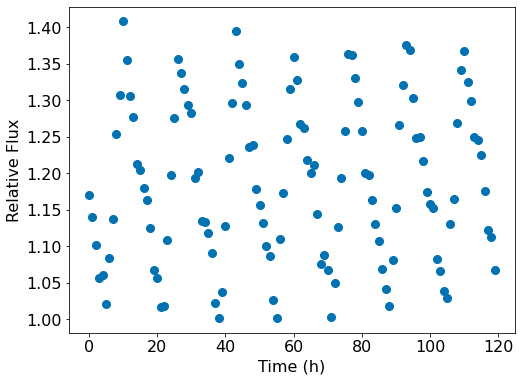

In [4]:
fname = 'P00051.csv'

data = Table.read(ddir+fname, format='ascii')
time, flux = data['Time'], data['Flux']
dt = np.median(np.diff(time))
print('Nyquist Limit', 0.5/dt,'cycles per hour')

plt.plot(time,flux,'.',markersize=16)
plt.xlabel('Time (h)')
plt.ylabel('Relative Flux')

Best period: 16.60 h


Text(0, 0.5, 'LS Power')

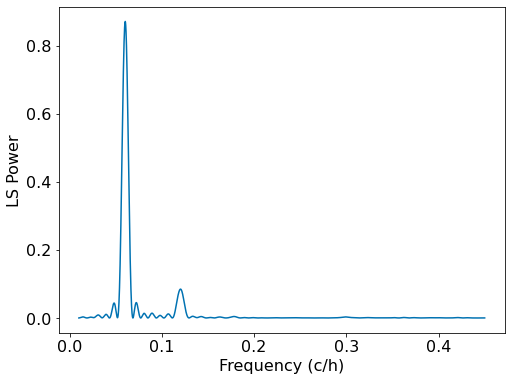

In [5]:
LS = LombScargle(time, flux)
freqs = np.linspace(1/100, 0.45, 10000)
power = LS.power(freqs)

print('Best period: %.2f h'% (1/freqs[np.argmax(power)]))

plt.plot(freqs,power)
plt.xlabel('Frequency (c/h)')
plt.ylabel('LS Power')

['Group7data/U07/Up/F06/P01651.csv', 'Group7data/U07/Up/F06/P02439.csv', 'Group7data/U07/Up/F06/P00628.csv', 'Group7data/U07/Up/F06/P01697.csv', 'Group7data/U07/Up/F06/P02312.csv', 'Group7data/U07/Up/F06/P00503.csv', 'Group7data/U07/Up/F06/P01153.csv', 'Group7data/U07/Up/F06/P01796.csv', 'Group7data/U07/Up/F06/P00475.csv', 'Group7data/U07/Up/F06/P04174.csv', 'Group7data/U07/Up/F06/P04555.csv', 'Group7data/U07/Up/F06/P04794.csv', 'Group7data/U07/Up/F06/P02456.csv', 'Group7data/U07/Up/F06/P00916.csv', 'Group7data/U07/Up/F06/P00325.csv', 'Group7data/U07/Up/F06/P01789.csv', 'Group7data/U07/Up/F06/P00051.csv', 'Group7data/U07/Up/F06/P00803.csv', 'Group7data/U07/Up/F06/P03880.csv']


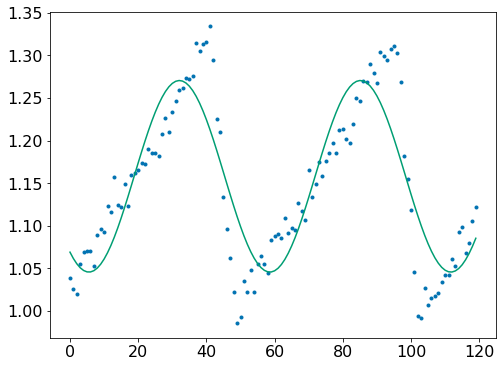

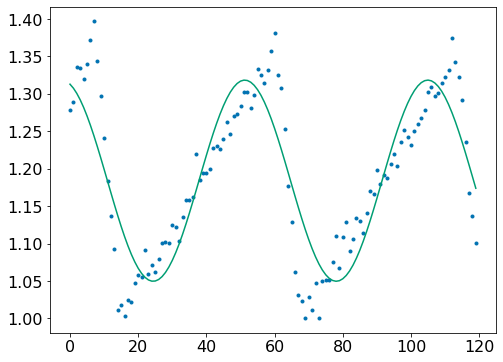

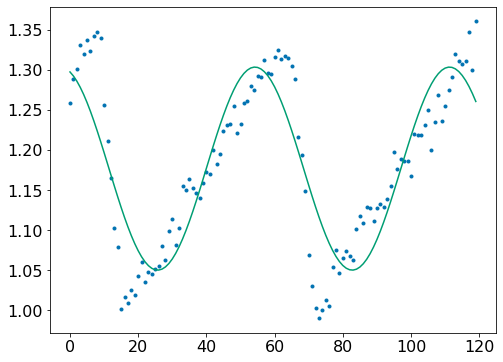

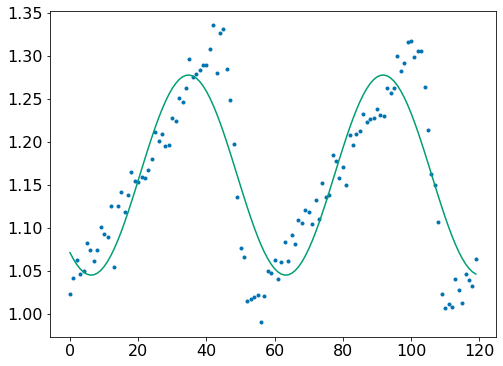

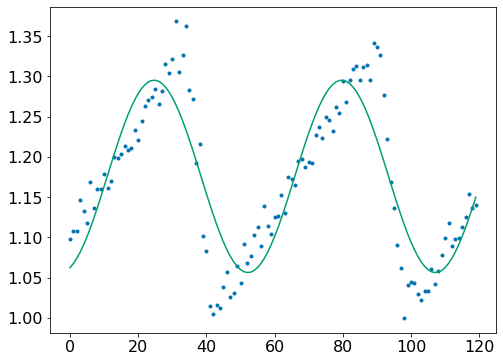

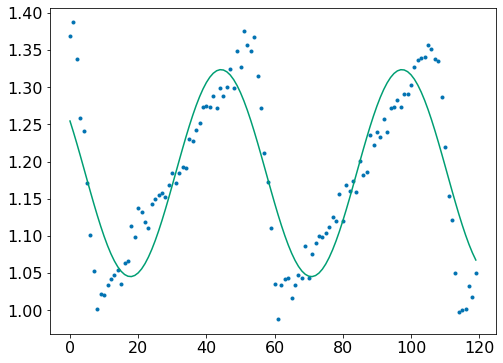

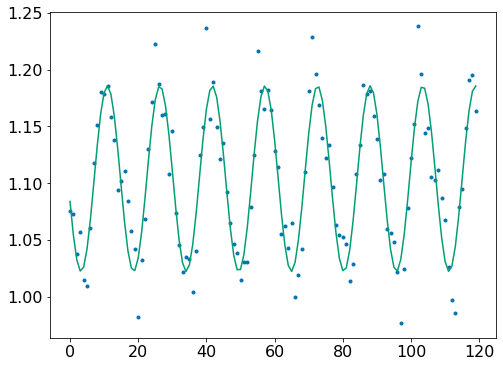

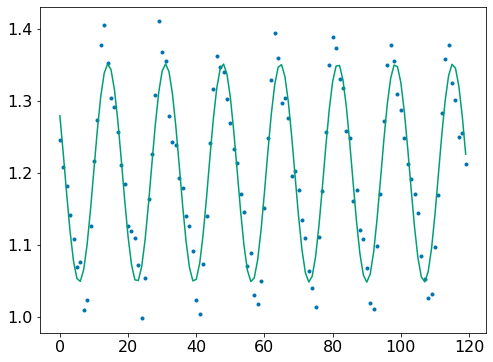

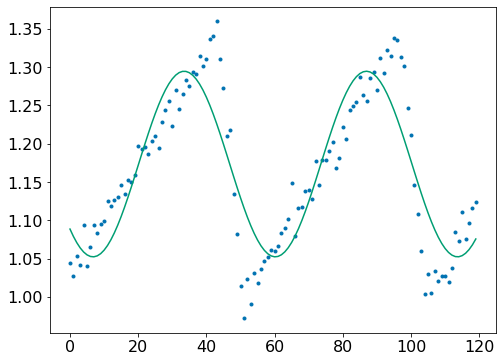

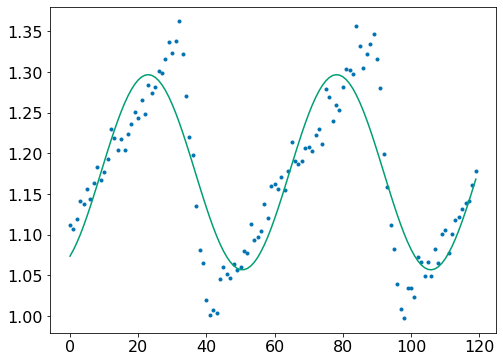

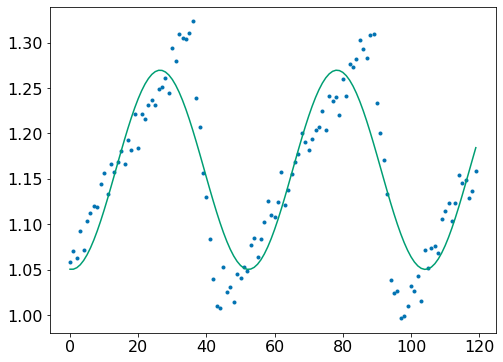

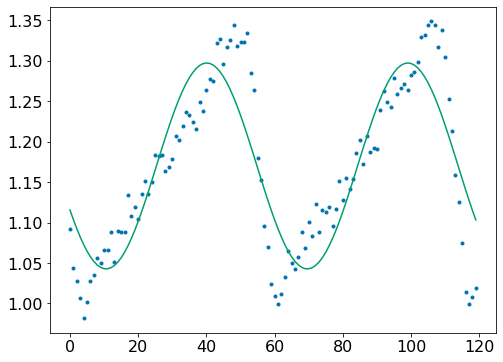

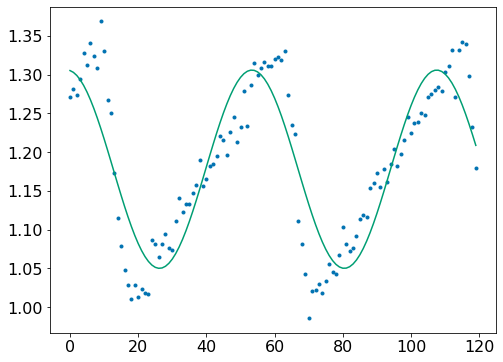

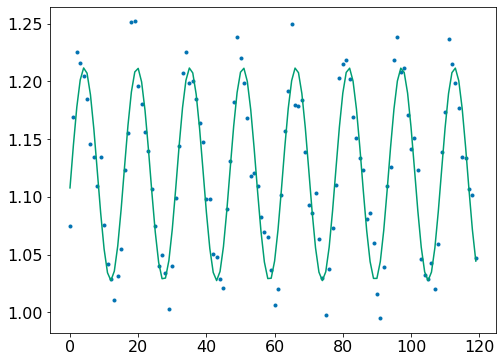

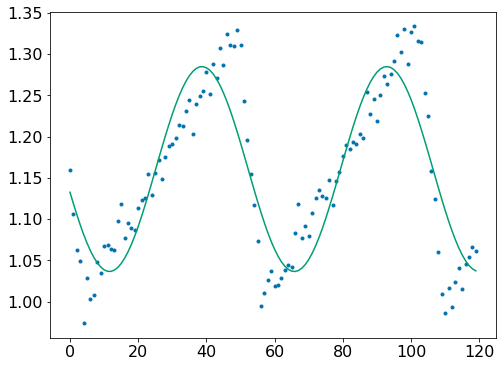

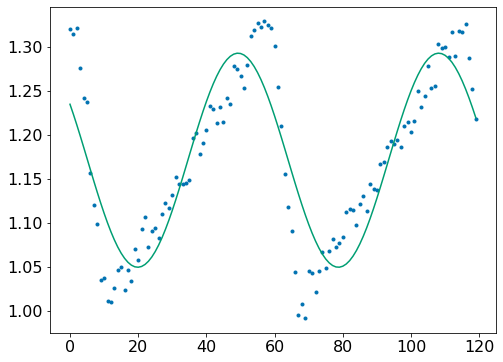

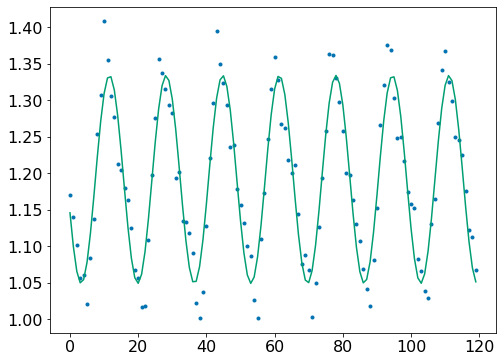

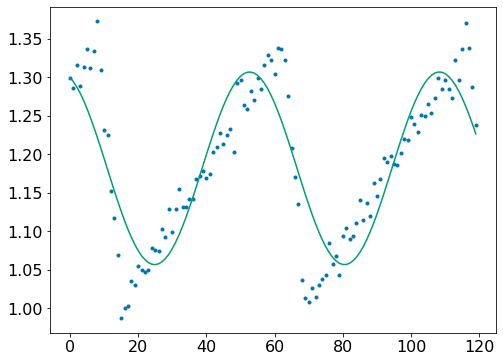

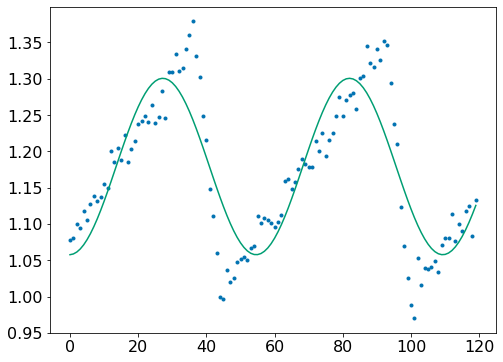

In [6]:
import glob

fnames = glob.glob(ddir+'*.csv')
print(fnames)

freqs = np.linspace(1/100, 0.45, 10000)
periods = []

for fname in fnames:
    data = Table.read(fname, format='ascii')
    time, flux = data['Time'], data['Flux']
    
    LS = LombScargle(time, flux)
    power = LS.power(freqs)
    bestfreq = freqs[np.argmax(power)]
    pred = LS.model(time,bestfreq)
    plt.plot(time,flux,'.')
    plt.plot(time,pred)
    plt.show()
    
    periods.append(1/bestfreq)
    
periods = np.array(periods)

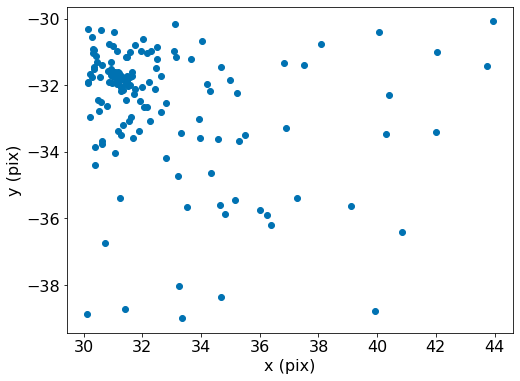

In [7]:
stars = Table.read(ddir+'points.txt',format='ascii')
variables = glob.glob(ddir+'*.csv')
varnames = [os.path.split(v)[-1].strip('.csv') for v in variables]

plt.scatter(stars['x'],stars['y'])
plt.xlabel('x (pix)')
plt.ylabel('y (pix)');

Text(0.5, 0, 'Log Flux 2 - Log Flux 0')

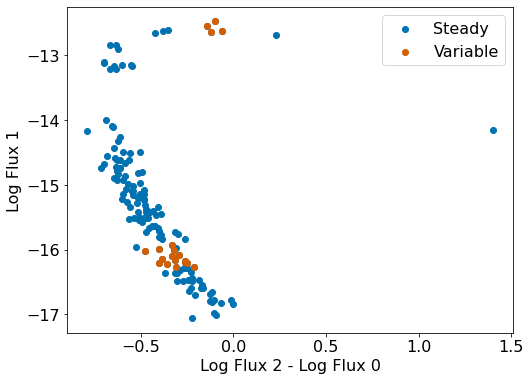

In [8]:
m0, m1, m2 = (np.log10(stars['flux1']), 
             np.log10(stars['flux2']),
             np.log10(stars['flux3']))
colour = m2-m0

s = plt.scatter(colour,m1)
for var in varnames:
    mm = [stars['name']==var]
    h = plt.scatter(colour[mm], m1[mm], color=colours[2])
    
plt.legend([s,h], ['Steady','Variable'])
plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

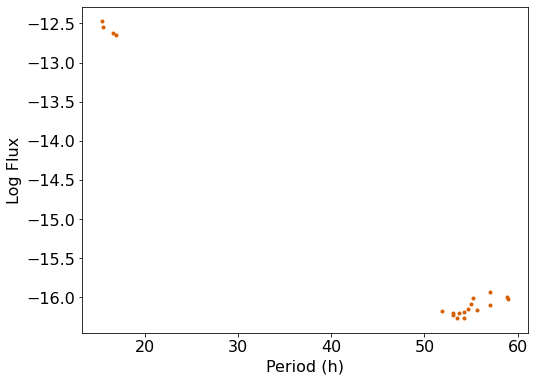

In [9]:
absmag = []
for var in varnames:
    mm = [stars['name']==var]
    absmag.append(m1[mm])
absmag = np.array(absmag)

plt.plot(periods,absmag, '.', color=colours[2])
plt.xlabel('Period (h)')
plt.ylabel('Log Flux');

In [ ]:
# There are several variable stars in this cluster, with both long and shorter periods. 
# if we can check if there are any variables in the BENCHMARK sample with the same period as one of these, 
# then we know they are the same brightness (?) 